# Madison Chester & Arturo Fredes

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt
from scipy.optimize import line_search

In [2]:
def f(x):
  return np.exp(3*x[0])+np.exp(-4*x[1])

def h(x):
  return x[0]**2+x[1]**2-1

def L(x,lam):
  return f(x)-lam*h(x)

def gradient_L(x,lam):
  return np.array([3*np.exp(3*x[0])-lam*2*x[0],
                   -4*np.exp(-4*x[1])-lam*2*x[1],
                   -x[0]**2-x[1]**2+1])

def Hessian_L(x,lam):
  return np.array([[9*np.exp(3*x[0])-lam*2,0,-2*x[0]],
                   [0,16*np.exp(-4*x[1])-2*lam,-2*x[1]],
                   [-2*x[0],-2*x[1],0]])

If we compute one step as seen in the example, we get the same result.

In [3]:
def Newton_step(x,lam):
  return np.linalg.solve(Hessian_L(x,lam),-gradient_L(x,lam))

In [4]:
x0=np.array([-1,1])
lam0=-1
update = Newton_step(x0,lam0)
d0 = update[0:2]
v0 = update[2]
print('d0:',d0)
print('v0:',v0)
x1 = x0 + d0
print('x1:',x1)
lam1 = lam0 + v0
print('lam1:',lam1)

d0: [ 0.22577436 -0.27422564]
v0: 0.648962140751563
x1: [-0.77422564  0.72577436]
lam1: -0.351037859248437


# Experiment 1
One simple way to proceed is to take $\alpha^k=1$ and iteratively update the current point to obtain
the next. This is a simple way to proceed that is proposed to perform first. The stopping
condition should be performed over $\nabla_xL$. Test this approach and check if it works using the
starting point proposed in the example.


Now we will iteratively calculate steps to find the solution.



In [5]:
def newton_method(starting_point, initial_lambda, alpha, max_iter=100, tol=1e-5):
    x = np.array(starting_point, dtype=float)
    lam = initial_lambda

    for i in range(max_iter):
        grad_L = gradient_L(x, lam)
        hessian_L = Hessian_L(x, lam)

        # solve the linear system to get the Newton direction
        direction = solve(hessian_L, -grad_L)

        # update variables with alpha
        x += alpha * direction[:2]
        lam += alpha * direction[2]

        # stopping condition
        if np.linalg.norm(grad_L) < tol:
            print(f"Converged after {i + 1} iterations.")
            break

        # print values at each iteration
        print(f"Iteration {i + 1}:")
        print("  x:", x)
        print("  Lambda:", lam)
        print("  Objective function value:", f(x))
        print("  Constraint value:", h(x))
        print("  Gradient of Lagrangian:", grad_L)
        print()

    return x, lam

# starting point [-1, 1], initial lambda -1, and alpha 1
starting_point = [-1, 1]
initial_lambda = -1
alpha = 1
result = newton_method(starting_point, initial_lambda, alpha)

print("Optimal point:", result[0])
print("Lagrange multiplier:", result[1])
print("Objective function value:", f(result[0]))
print("Constraint value:", h(result[0]))

Iteration 1:
  x: [-0.77422564  0.72577436]
  Lambda: -0.351037859248437
  Objective function value: 0.15286391954295916
  Constraint value: 0.12617376319081974
  Gradient of Lagrangian: [-1.85063879  1.92673744 -1.        ]

Iteration 2:
  x: [-0.74864523  0.66613893]
  Lambda: -0.2160587285936944
  Objective function value: 0.17545875587634466
  Constraint value: 0.004210742670570422
  Gradient of Lagrangian: [-0.24953242  0.29013635 -0.12617376]

Iteration 3:
  x: [-0.74833818  0.66332345]
  Lambda: -0.21232390186241443
  Objective function value: 0.17634488719788904
  Constraint value: 8.021199873864404e-06
  Gradient of Lagrangian: [-0.00601725  0.00932913 -0.00421074]

Converged after 4 iterations.
Optimal point: [-0.74833549  0.66332043]
Lagrange multiplier: -0.2123249355295414
Objective function value: 0.17634659028315192
Constraint value: 1.63060676072746e-11


As we can see in the following graph, we found the minimum which lies on the curve h(x)=1.

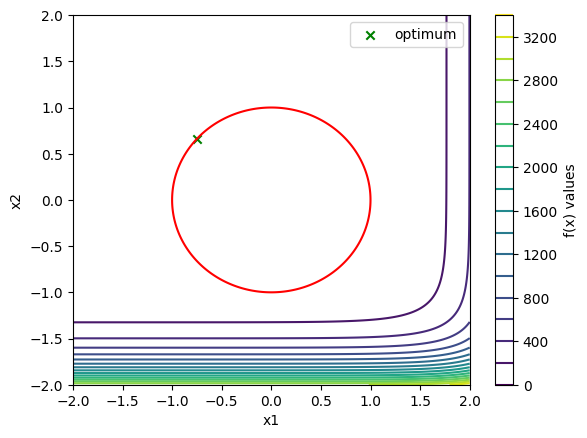

In [6]:
# create a grid of x and y values
x = np.linspace(-2, 2, 400)  # Adjust the range and resolution as needed
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)

# calculate the values of f(x) and h(x) for the grid
Z_f = f([X, Y])
Z_h = h([X, Y])

# create a contour plot for f(x)
contour_f =plt.contour(X, Y, Z_f, levels=20, cmap='viridis', label='f(x)')

# create a contour plot for h(x) = 0
plt.contour(X, Y, Z_h, levels=[0], colors='red', label='h(x) = 0 ')
plt.scatter(result[0][0],result[0][1],marker='x',color='green',label='optimum')
colorbar_f = plt.colorbar(contour_f, label='f(x) values')
# label the axes and add a legend
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

# show the plot
plt.show()

# Experiment 2

Because this is a Newton like iteration, it may diverge from poor starting points. In previous examples, we have chosen a starting point that was near the optimum. Now, we will examine the iterations when a starting point that is further from the optimum is chosen.

Experiment 1 with starting point [-5, 5]:
Iteration 1:
  x: [-2.55000189  2.54999811]
  Lambda: -0.4900003875944907
  Objective function value: 0.0005132120251365096
  Constraint value: 12.00500000000717
  Gradient of Lagrangian: [ -9.99999908   9.99999999 -49.        ]

Iteration 2:
  x: [-1.37590148  1.37017695]
  Lambda: -0.22687781679493252
  Objective function value: 0.020286220223977934
  Constraint value: 2.770489749079168
  Gradient of Lagrangian: [ -2.49757571   2.49885144 -12.005     ]

Iteration 3:
  x: [-0.93383102  0.80309729]
  Lambda: -0.1137750182348838
  Objective function value: 0.10097964740087167
  Constraint value: 0.5170056295175582
  Gradient of Lagrangian: [-0.57596353  0.60505999 -2.77048975]

Iteration 4:
  x: [-0.76413079  0.67854018]
  Lambda: -0.1678623153348513
  Objective function value: 0.16728502520300229
  Constraint value: 0.044312641045257894
  Gradient of Lagrangian: [-0.03033527  0.02170358 -0.51700563]

Iteration 5:
  x: [-0.74863253  0.66334045]


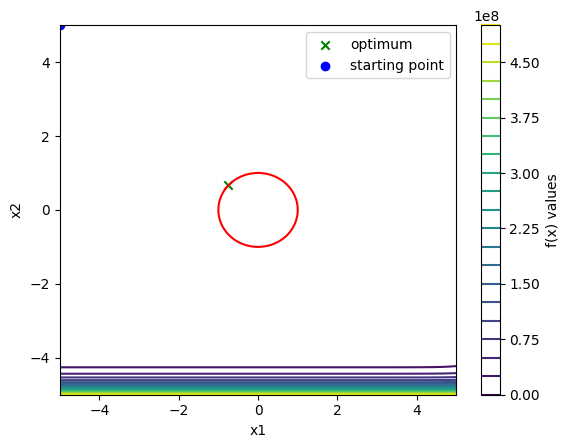

Experiment 2 with starting point [-1, -1]:
Iteration 1:
  x: [-0.7502977 -0.7497023]
  Lambda: -0.3803266627872418
  Objective function value: 20.166938801847852
  Constraint value: 0.12500017724516344
  Gradient of Lagrangian: [  -1.85063879 -220.39260013   -1.        ]

Iteration 2:
  x: [-0.9163086  -0.50019302]
  Lambda: -0.021526429038663475
  Objective function value: 7.458759849580945
  Constraint value: 0.08981450159197824
  Gradient of Lagrangian: [ -0.25480103 -80.81679821  -0.12500018]

Iteration 3:
  x: [-1.00406626 -0.24964904]
  Lambda: -0.07511977273672432
  Objective function value: 2.7636518577691183
  Constraint value: 0.0704736954905616
  Gradient of Lagrangian: [  0.15254001 -29.60058786  -0.0898145 ]

Iteration 4:
  x: [-1.03110390e+00  2.39470309e-04]
  Lambda: -0.06549363456067361
  Objective function value: 1.044394092877315
  Constraint value: 0.06317529986366766
  Gradient of Lagrangian: [-3.30020951e-03 -1.08953809e+01 -7.04736955e-02]

Iteration 5:
  x: [-1.

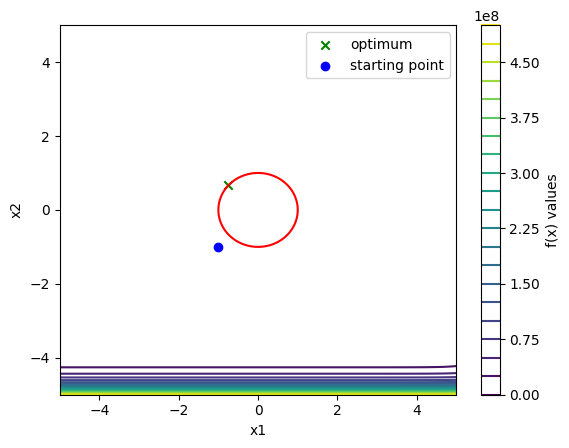

Experiment 3 with starting point [2, -3]:
Iteration 1:
  x: [-0.61782892 -2.74521928]
  Lambda: -2074.9793329203685
  Objective function value: 58740.20999559505
  Constraint value: 6.917941455421354
  Gradient of Lagrangian: [ 1.21428638e+03 -6.51025166e+05 -1.20000000e+01]

Iteration 2:
  x: [ 3.51589396 -2.41554171]
  Lambda: -13888.212467372003
  Objective function value: 53800.83342682518
  Constraint value: 17.196352080027506
  Gradient of Lagrangian: [-2.56349440e+03 -2.46352760e+05 -6.91794146e+00]

Iteration 3:
  x: [ 1.98873045 -1.07885145]
  Lambda: -64231.99323713657
  Objective function value: 464.86138536967155
  Constraint value: 4.1189692444934005
  Gradient of Lagrangian: [ 2.11926086e+05 -1.29942285e+05 -1.71963521e+01]

Iteration 4:
  x: [ 1.19076834 -0.64083649]
  Lambda: -26182.61153390137
  Objective function value: 48.57772615665233
  Constraint value: 0.8286006368662242
  Gradient of Lagrangian: [ 2.56650294e+05 -1.38892934e+05 -4.11896924e+00]

Iteration 5:
  x

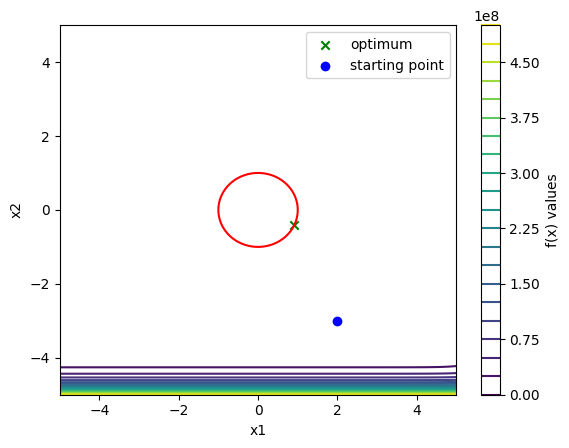

Experiment 4 with starting point [1, 1]:
Iteration 1:
  x: [0.66780806 0.83219194]
  Lambda: -0.22902742952526212
  Objective function value: 7.45023810644537
  Constraint value: 0.13851103083030591
  Gradient of Lagrangian: [62.25661077  1.92673744 -1.        ]

Iteration 2:
  x: [0.33727749 1.01421181]
  Lambda: 0.02667386909069641
  Objective function value: 2.767940311441073
  Constraint value: 0.14238168947185326
  Gradient of Lagrangian: [22.54909533  0.23784061 -0.13851103]

Iteration 3:
  x: [0.00241636 1.05537705]
  Lambda: -0.029586120803602213
  Objective function value: 1.0219519197634384
  Constraint value: 0.11382654865908792
  Gradient of Lagrangian: [ 8.23391748 -0.12331985 -0.14238169]

Iteration 4:
  x: [-0.328774    1.00220837]
  Lambda: -0.03521838775737729
  Objective function value: 0.39110042953368535
  Constraint value: 0.11251396277036996
  Gradient of Lagrangian: [ 3.02196926  0.00374305 -0.11382655]

Iteration 5:
  x: [-0.64280614  0.84305725]
  Lambda: -0.06

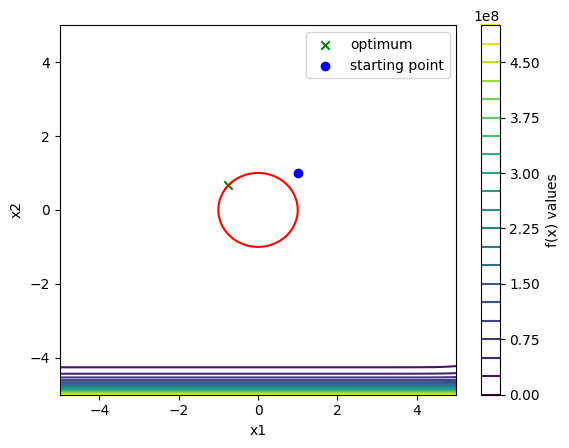

In [7]:
# range of starting points
starting_points = [
    [-5, 5],
    [-1, -1],
    [2, -3],
    [1, 1]]

# other parameters
initial_lambda = -1
alpha = 1

# experiments with different starting points
for i, starting_point in enumerate(starting_points):
    print(f"Experiment {i + 1} with starting point {starting_point}:")
    result = newton_method(starting_point, initial_lambda, alpha)
    print("Optimal point:", result[0])
    print("Lagrange multiplier:", result[1])
    print("Objective function value:", f(result[0]))
    print("Constraint value:", h(result[0]))
    print("\n" + "=" * 40 + "\n")

    """plot"""
    # create a grid of x and y values
    x = np.linspace(-5, 5, 400)  # Adjust the range and resolution as needed
    y = np.linspace(-5, 5, 400)
    X, Y = np.meshgrid(x, y)

    # calculate the values of f(x) and h(x) for the grid
    Z_f = f([X, Y])
    Z_h = h([X, Y])

    # create a contour plot for f(x)
    contour_f =plt.contour(X, Y, Z_f, levels=20, cmap='viridis', label='f(x)')
    colorbar_f = plt.colorbar(contour_f, label='f(x) values')
    # create a contour plot for h(x) = 0
    plt.contour(X, Y, Z_h, levels=[0], colors='red', label='h(x) = 0 ')

    # label the axes and add a legend
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.scatter(result[0][0],result[0][1],marker='x',color='green',label='optimum')
    plt.scatter(starting_points[i][0],starting_points[i][1],marker='o',color='blue',label='starting point')
    plt.legend()

    # show the plot
    plt.show()


A we can see in this experiment, the optimum is not always found, and finding it depends on the starting point chosen

# Experiment 3

One way to find the optimal solution from points that are far away of the optimal solution is to start the optimization with another function that allows us to find an approximation to the solution we are looking for. Once an approximate solution is found, we can apply the Newton-based technique to find the optimal solution.

The function that allows us to find an approximation to the solution we are looking for is called the merit function. Usually, a merit function is the sum of terms that include the objective function and the amount of infeasibility of the constraints. One example of a merit function for the problem we are treating is the quadratic penalty function (i.e. constraints are penalized quadratically). The greater the value of ρ, the greater the penalty for infeasibility. The difficulty arises in defining a proper merit function for a particular equality constrained problem.

Here, we will take ρ = 10 (thus, we penalize a lot the constraint) and perform a
classical gradient descent to find an approximation to the solution we are looking for. We observe if we arrive near to the optimal solution of the problem. We normalize the gradient at each iteration and use this
normalized gradient as search direction.

In [8]:
# quadratic penalty function (merit function)
def merit_function(x, lam, penalty_weight=10):
    return f(x) + penalty_weight * h(x)**2

# gradient of the merit function
def gradient_merit_function(x, lam, penalty_weight=10):
    grad_f = gradient_L(x, lam)[:2]
    grad_h = gradient_h(x)
    return np.concatenate([grad_f + 2 * penalty_weight * h(x) * grad_h, [-h(x)]])

# normalized gradient
def normalized_gradient(x):
    norm_grad = np.linalg.norm(x)
    return x / (norm_grad if norm_grad != 0 else 1)

# gradient of the constraint function h
def gradient_h(x):
    return np.array([2*x[0], 2*x[1]])

# gradient descent with backtracking line search
def gradient_descent(starting_point, initial_lambda, penalty_weight=10, max_iter=100, tol=1e-5):
    x = np.array(starting_point, dtype=float)
    lam = initial_lambda

    prev_merit = np.inf  # initialize with a large value

    for i in range(max_iter):
        grad_merit = gradient_merit_function(x, lam, penalty_weight)
        normalized_grad = normalized_gradient(grad_merit)

        # backtracking line search
        step_size = 1.0
        while merit_function(x - step_size * normalized_grad[:-1], lam) > merit_function(x, lam) - 0.1 * step_size * np.dot(grad_merit[:-1], normalized_grad[:-1]):
            step_size *= 0.5

        # update variables
        x = x - step_size * normalized_grad[:-1]  # exclude the last element (lambda)

        # stopping condition
        current_merit = merit_function(x, lam)
        if prev_merit - current_merit < tol:
            print(f"Converged after {i + 1} iterations.")
            break

        prev_merit = current_merit

        # print values at each iteration
        print(f"Iteration {i + 1}:")
        print("  x:", x)
        print("  Lambda:", lam)
        print("  Merit function value:", current_merit)
        print("  Constraint value:", h(x))
        print("  Normalized gradient of Merit function:", normalized_grad[:-1])  # exclude the last element
        print()

    return x, lam
starting_point=[1, 1]
# perform gradient descent with quadratic penalty function
approx_result = gradient_descent(starting_point, initial_lambda)

# print the approximation result
print("Approximation Result:")
print("  x:", approx_result[0])
print("  Lambda:", approx_result[1])
print("  Merit function value:", merit_function(approx_result[0], approx_result[1]))
print("  Constraint value:", h(approx_result[0]))
print("\n" + "=" * 40 + "\n")

# continue with Newton-based technique using the approximation result
result_newton = newton_method(approx_result[0], approx_result[1], alpha)
print("Optimal point (after Newton-based technique):", result_newton[0])
print("Lagrange multiplier (after Newton-based technique):", result_newton[1])
print("Objective function value (after Newton-based technique):", f(result_newton[0]))
print("Constraint value (after Newton-based technique):", h(result_newton[0]))

Iteration 1:
  x: [0.07479082 0.62065042]
  Lambda: -1
  Merit function value: 5.046301688844445
  Constraint value: -0.6091993910365483
  Normalized gradient of Merit function: [0.92520918 0.37934958]

Iteration 2:
  x: [0.00241587 1.11493097]
  Lambda: -1
  Merit function value: 1.6097033086734762
  Constraint value: 0.24307690494573664
  Normalized gradient of Merit function: [ 0.1447499 -0.9885611]

Iteration 3:
  x: [-0.02608214  0.99324405]
  Lambda: -1
  Merit function value: 0.9451886947265322
  Constraint value: -0.012785973166564712
  Normalized gradient of Merit function: [0.22798404 0.97349534]

Iteration 4:
  x: [-0.91582934  0.53680937]
  Lambda: -1
  Merit function value: 0.3419506410566996
  Constraint value: 0.12690768380910256
  Normalized gradient of Merit function: [0.8897472  0.45643468]

Iteration 5:
  x: [-0.8606095  0.5075557]
  Lambda: -1
  Merit function value: 0.2069720646730945
  Constraint value: -0.0017384992989124548
  Normalized gradient of Merit functio

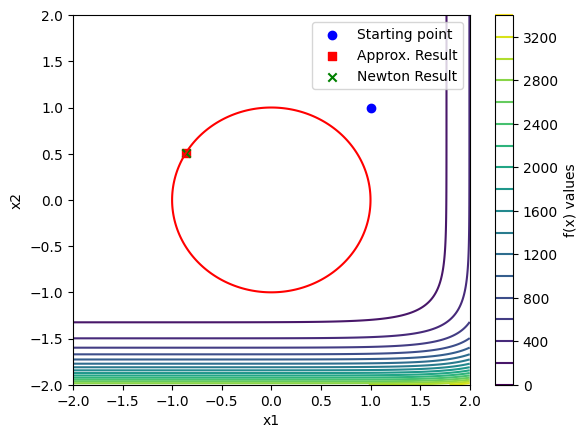

In [9]:
# create a grid of x and y values
x = np.linspace(-2, 2, 400)  # Adjust the range and resolution as needed
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)

# calculate the values of f(x) and h(x) for the grid
Z_f = f([X, Y])
Z_h = h([X, Y])

# create a contour plot for f(x)
contour_f =plt.contour(X, Y, Z_f, levels=20, cmap='viridis', label='f(x)')

# create a contour plot for h(x) = 0
plt.contour(X, Y, Z_h, levels=[0], colors='red', label='h(x) = 0 ')
plt.scatter(starting_point[0],starting_point[1],marker='o',color='blue',label='Starting point')
plt.scatter(approx_result[0][0],approx_result[0][1],marker='s',color='red',label='Approx. Result')
plt.scatter(approx_result[0][0],approx_result[0][1],marker='x',color='green',label='Newton Result')
colorbar_f = plt.colorbar(contour_f, label='f(x) values')
# label the axes and add a legend
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

# show the plot
plt.show()

We can see that the optimum reached using the approximation is x: [-0.8606095,  0.5075557] as compared to the optimum reached by the Newton method, x: [-0.74833549,  0.66332043].

# Experiment 4
 We will now try and find the optimum in the case of Experiment 2 were we were not able to do so. That was when we started at point: $x_1=2$  and  $x_2=-3$

In [10]:
starting_point=[2, -3]
initial_lambda=-1
# perform gradient descent with quadratic penalty function
approx_result = gradient_descent(starting_point, initial_lambda)

# print the approximation result
print("Approximation Result:")
print("  x:", approx_result[0])
print("  Lambda:", approx_result[1])
print("  Merit function value:", merit_function(approx_result[0], approx_result[1]))
print("  Constraint value:", h(approx_result[0]))
print("\n" + "=" * 40 + "\n")

# continue with Newton-based technique using the approximation result
result_newton = newton_method(approx_result[0], approx_result[1], alpha)
print("Optimal point (after Newton-based technique):", result_newton[0])
print("Lagrange multiplier (after Newton-based technique):", result_newton[1])
print("Objective function value (after Newton-based technique):", f(result_newton[0]))
print("Constraint value (after Newton-based technique):", h(result_newton[0]))

Iteration 1:
  x: [ 1.9966676  -2.00000555]
  Lambda: -1
  Merit function value: 3868.580214364567
  Constraint value: 6.986703719163037
  Normalized gradient of Merit function: [ 0.0033324  -0.99999445]

Iteration 2:
  x: [ 1.85708183 -1.00979572]
  Lambda: -1
  Merit function value: 439.8418689225052
  Constraint value: 3.468440310654442
  Normalized gradient of Merit function: [ 0.13958578 -0.99020983]

Iteration 3:
  x: [ 0.91375053 -0.67795789]
  Lambda: -1
  Merit function value: 31.430905229221818
  Constraint value: 0.29456693205961715
  Normalized gradient of Merit function: [ 0.9433313  -0.33183783]

Iteration 4:
  x: [0.26624926 0.08409965]
  Lambda: -1
  Merit function value: 11.438645547165954
  Constraint value: -0.9220385791305452
  Normalized gradient of Merit function: [ 0.64750127 -0.76205754]

Iteration 5:
  x: [0.67404799 0.985813  ]
  Lambda: -1
  Merit function value: 9.39008055006297
  Constraint value: 0.42616795764488824
  Normalized gradient of Merit function:

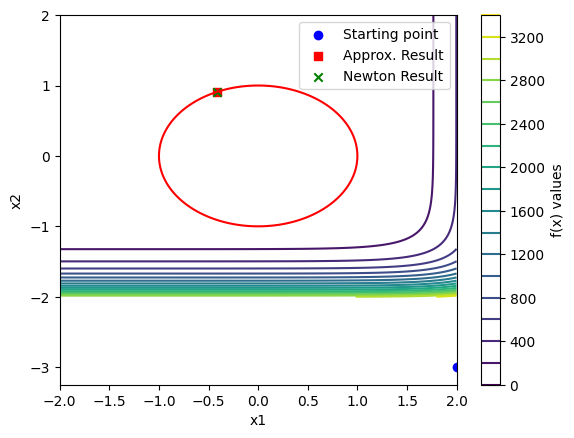

In [11]:
# create a grid of x and y values
x = np.linspace(-2, 2, 400)  # Adjust the range and resolution as needed
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)

# calculate the values of f(x) and h(x) for the grid
Z_f = f([X, Y])
Z_h = h([X, Y])

# create a contour plot for f(x)
contour_f =plt.contour(X, Y, Z_f, levels=20, cmap='viridis', label='f(x)')

# create a contour plot for h(x) = 0
plt.contour(X, Y, Z_h, levels=[0], colors='red', label='h(x) = 0 ')
plt.scatter(starting_point[0],starting_point[1],marker='o',color='blue',label='Starting point')
plt.scatter(approx_result[0][0],approx_result[0][1],marker='s',color='red',label='Approx. Result')
plt.scatter(approx_result[0][0],approx_result[0][1],marker='x',color='green',label='Newton Result')
colorbar_f = plt.colorbar(contour_f, label='f(x) values')
# label the axes and add a legend
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

# show the plot
plt.show()

As we can see, by computing an approximation first and the using the newthon like method, we are now able to find the optimum.